In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower
import pandas as pd
import re

In [2]:
""" This naming scheme sucks! I only made it in a rush 
    You need to be more obvious about what the indices mean."""
baseline0 = pd.read_csv("power_nu/Aletheia_powernu_zorig_nu0.002_caso0_0000.dat",
                       names=["k", "P_no", "P_nu", "ratio"], sep='\s+')
baseline1 = pd.read_csv("power_nu/Aletheia_powernu_zorig_nu0.002_caso0_0001.dat",
                       names=["k", "P_no", "P_nu", "ratio"], sep='\s+')
baseline2 = pd.read_csv("power_nu/Aletheia_powernu_zorig_nu0.002_caso0_0002.dat",
                       names=["k", "P_no", "P_nu", "ratio"], sep='\s+')
baseline3 = pd.read_csv("power_nu/Aletheia_powernu_zorig_nu0.002_caso0_0003.dat",
                       names=["k", "P_no", "P_nu", "ratio"], sep='\s+')
baseline4 = pd.read_csv("power_nu/Aletheia_powernu_zorig_nu0.002_caso0_0004.dat",
                       names=["k", "P_no", "P_nu", "ratio"], sep='\s+')

In [3]:
baseline0

,k,P_no,P_nu,ratio
0,0.000100,366.141800,366.325200,1.000501
1,0.000101,370.128000,370.313700,1.000502
2,0.000102,374.157500,374.345400,1.000502
3,0.000103,378.230700,378.421000,1.000503
4,0.000105,382.348300,382.540900,1.000504
...,...,...,...,...
995,7.560918,0.096313,0.086124,0.894205
996,7.646763,0.093496,0.083604,0.894190
997,7.733582,0.090761,0.081156,0.894176
998,7.821388,0.088105,0.078780,0.894162


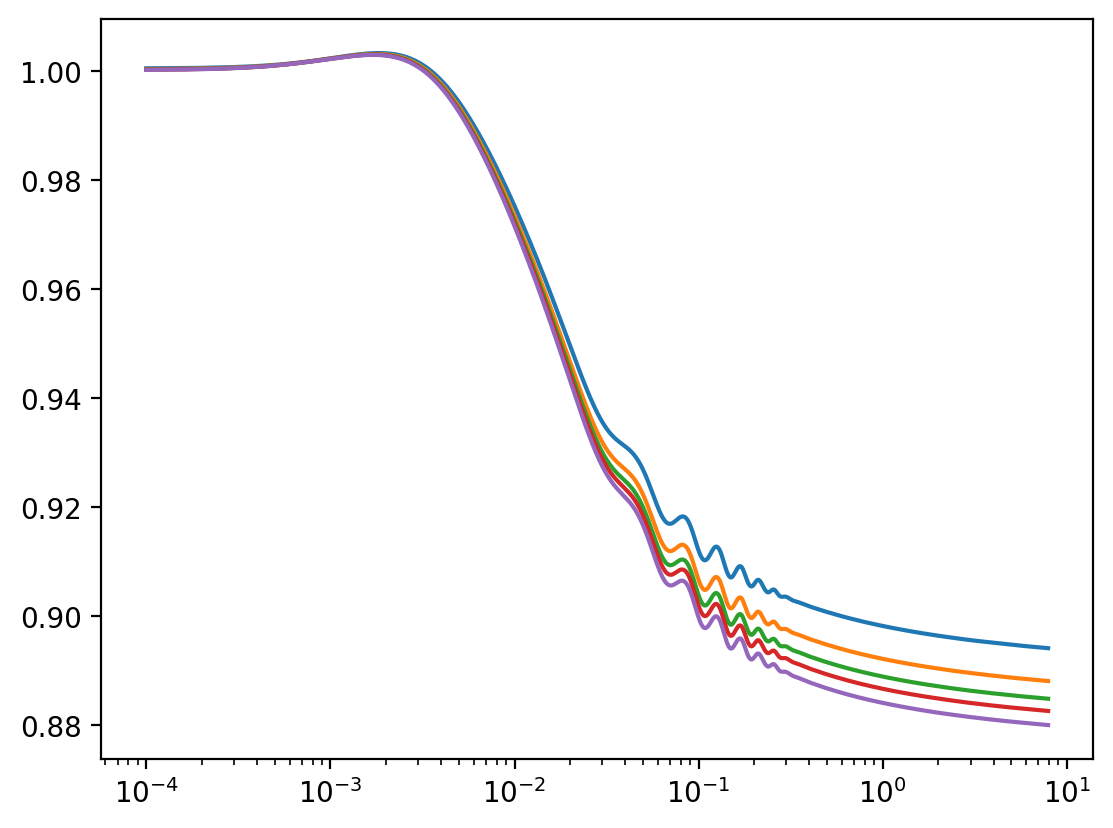

In [4]:
plt.plot(baseline0["k"], baseline0["ratio"])
plt.plot(baseline1["k"], baseline1["ratio"])
plt.plot(baseline2["k"], baseline2["ratio"])
plt.plot(baseline3["k"], baseline3["ratio"])
plt.plot(baseline4["k"], baseline4["ratio"])
plt.xscale('log')

In [6]:
baseline0["k"]

0      0.000100
1      0.000101
2      0.000102
3      0.000103
4      0.000105
         ...   
995    7.560918
996    7.646763
997    7.733582
998    7.821388
999    7.910190
Name: k, Length: 1000, dtype: float64

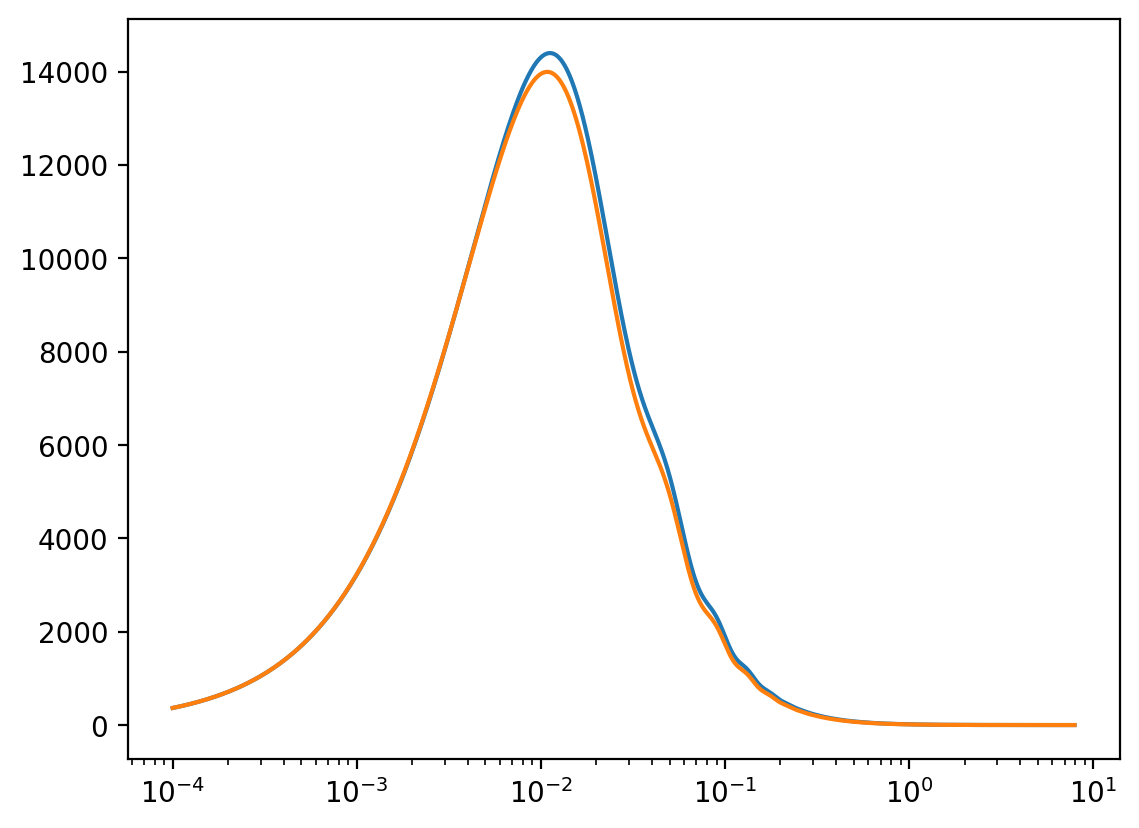

In [7]:
plt.plot(baseline0["k"], baseline0["P_no"])
plt.plot(baseline0["k"], baseline0["P_nu"])
plt.xscale('log')

In [ ]:
    pars = camb.CAMBparams()
    omch2_in = mlc["omch2"]
    if massive_neutrinos:
        omch2_in = mlc["omch2"] - omnuh2_in
        pars.omnuh2=omnuh2_in
    pars.set_cosmology(
        H0=mlc["h"] * 100,
        ombh2=mlc["ombh2"],
        omch2=omch2_in,
        omk=mlc["OmK"])
    pars.InitPower.set_params(As=mlc["A_s"], ns=mlc["n_s"])
    
    """
    print("\nmassive_neutrinos:", massive_neutrinos)
    print("H0:", mlc["h"] * 100)
    print("ombh2:", mlc["ombh2"])
    print("omch2:", omch2_in)
    print("OmK:", mlc["OmK"])
    print("n_s:", mlc["n_s"])
    print("w0:", mlc["w0"])
    print("wa:", mlc["wa"])
    print("A_s:", mlc["A_s"])
    """
    
    pars.DarkEnergy = camb.dark_energy.DarkEnergyPPF(w=mlc["w0"], wa=float(mlc["wa"]))
    
    pars.set_matter_power(redshifts=zs, kmax=2.0)
    pars.NonLinear = model.NonLinear_none
    results = camb.get_results(pars)
    results.calc_power_spectra(pars)
    
    if sigma12_in != 1:
        sigma12_unmodified = results.get_sigmaR(12, hubble_units=False)
        As_rescaled = 2e-9 * (sigma12_in / sigma12_unmodified) ** 2

        print("A_s:", As_rescaled)
        pars.InitPower.set_params(As=As_rescaled, ns=mlc["n_s"])

    k, z, p = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
    sigma12 = results.get_sigmaR(12, hubble_units=False)
    return k, z, p, sigma12